Ссылка на Колаб

https://colab.research.google.com/drive/1zahApPVCu0_9fz9yuiL2L1g-rnFdwv6s#scrollTo=O3U8vKNP72T7

покажи Tensorboard

RNN в картинках от "Системного блока".

https://sysblok.ru/knowhow/mama-myla-lstm-kak-ustroeny-rekurrentnye-nejroseti-s-dolgoj-kratkosrochnoj-pamjatju/

https://sysblok.ru/knowhow/vnimanie-vse-chto-vam-nuzhno-kak-rabotaet-attention-v-nejrosetjah/

https://sysblok.ru/knowhow/kak-rabotajut-transformery-krutejshie-nejroseti-nashih-dnej/

Внимание, ИТМО

https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%85%D0%B0%D0%BD%D0%B8%D0%B7%D0%BC_%D0%B2%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D1%8F

# Функции активации

Основные неплохо рассмотрены [здесь](https://neurohive.io/ru/osnovy-data-science/activation-functions/).

Полный список [здесь](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%B0%D1%86%D0%B8%D0%B8).

# Функции потерь


#### 1. (R)MSE ((Root) Mean Squared Error)

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_n^N (y_n - \hat{y}_n)^2$$

#### 2. MAE (Mean Absolute Error)

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_n^N |y_n - \hat{y}_n|$$


**3. RSE (Relative Squared Error)**

$$ L(\hat{y}, y) = \sqrt\frac{\sum\limits_n^N (y_n - \hat{y}_n)^2}{\sum\limits_n^N (y_n - \bar{y})^2}$$

**4. RAE (Relative Absolute Error)**

$$ L(\hat{y}, y) = \frac{\sum\limits_n^N |y_n - \hat{y}_n|}{\sum\limits_n^N |y_n - \bar{y}|}$$

**5. MAPE (Mean Absolute Persentage Error)**

$$ L(\hat{y}, y) = \frac{100}{N} \sum\limits_n^N\left|\frac{ y_n - \hat{y}_n}{y_n}\right|$$




**6. RMSLE (Root Mean Squared Logarithmic Error)**

$$ L(\hat{y}, y) = \sqrt{\frac{1}{N}\sum\limits_n^N(\log(y_n + 1) - \log(\hat{y}_n + 1))^2}$$

# Искусственные нейронные сети

Считываем набор данных цифр MNIST.

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import numpy as np

In [2]:
digits = load_digits()

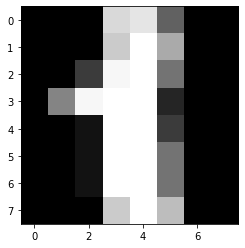

In [3]:
img = digits.images
plt.imshow(img[1], cmap=plt.cm.Greys_r);

In [4]:
X = img.reshape(-1, 64)
y = digits.target
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
test_y = test_y.reshape(1, -1)

Персептрон из библиотеки [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier).

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
model = MLPClassifier((128, 64), activation='relu')

In [7]:
train_y

array([1, 8, 2, ..., 8, 3, 6])

In [8]:
model.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(128, 64))

In [9]:
y_hat = model.predict(test_x)

In [10]:
y_hat

array([6, 4, 5, 5, 2, 2, 6, 0, 6, 9, 5, 4, 0, 8, 6, 1, 1, 6, 4, 8, 2, 6,
       3, 8, 0, 8, 7, 0, 9, 1, 0, 5, 5, 5, 3, 8, 4, 0, 2, 7, 8, 4, 3, 4,
       2, 9, 7, 3, 0, 5, 7, 9, 9, 8, 3, 6, 1, 1, 1, 7, 9, 7, 9, 9, 3, 1,
       1, 2, 2, 0, 5, 6, 2, 1, 3, 8, 8, 3, 1, 3, 7, 8, 4, 2, 0, 1, 3, 7,
       5, 0, 7, 3, 5, 5, 6, 0, 8, 3, 3, 9, 0, 5, 7, 7, 9, 1, 8, 2, 2, 3,
       7, 6, 0, 1, 3, 8, 4, 1, 6, 4, 9, 6, 0, 9, 6, 3, 1, 9, 4, 6, 7, 4,
       7, 1, 0, 3, 6, 9, 6, 6, 2, 0, 9, 0, 6, 8, 8, 6, 5, 2, 7, 8, 5, 4,
       3, 3, 3, 4, 5, 8, 5, 5, 3, 9, 7, 2, 3, 6, 1, 5, 5, 5, 8, 4, 7, 9,
       4, 1, 9, 1, 7, 3, 4, 5, 2, 1, 4, 8, 6, 2, 5, 2, 9, 5, 0, 2, 2, 9,
       5, 8, 5, 5, 7, 7, 3, 5, 2, 3, 2, 9, 7, 2, 2, 0, 9, 4, 1, 3, 3, 0,
       1, 3, 5, 6, 1, 1, 8, 9, 6, 9, 4, 0, 6, 5, 6, 4, 0, 4, 7, 4, 0, 3,
       3, 4, 4, 0, 4, 0, 5, 9, 9, 1, 9, 9, 6, 1, 0, 0, 9, 1, 8, 0, 3, 8,
       2, 6, 2, 1, 5, 4, 5, 1, 1, 5, 1, 9, 2, 4, 5, 2, 2, 8, 4, 2, 5, 1,
       1, 5, 7, 8, 1, 7, 2, 7, 3, 5, 6, 3, 6, 9, 1,

In [11]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  0,  1],
       [ 1,  1,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 37]])

In [12]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([0.97297297, 0.94736842, 1.        , 1.        , 1.        ,
        0.97674419, 1.        , 1.        , 0.96774194, 0.94871795]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.97674419, 0.97142857, 0.96428571, 0.9375    , 0.94871795]),
 array([0.98630137, 0.97297297, 1.        , 1.        , 1.        ,
        0.97674419, 0.98550725, 0.98181818, 0.95238095, 0.94871795]),
 array([36, 36, 38, 39, 34, 43, 35, 28, 32, 39]))

In [13]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9805555555555555

In [ ]:
import pickle

In [ ]:
with open('perceptron.pickle', 'wb') as out_file:
    pickle.dump(model, out_file)

In [ ]:
with open('perceptron.pickle', 'rb') as out_file:
    model2 = pickle.load(out_file)
y_hat2 = model2.predict(test_x)
accuracy_score(test_y.reshape(-1), y_hat2)

In [14]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_random_state',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_data',
 '_validate_hyperparameters',
 '_validate_inpu

In [15]:
len(model.coefs_), len(model.coefs_[0])

(3, 64)

In [16]:
model.coefs_[0][:, 10].reshape((8, -1))

array([[-0.00247475, -0.09960008, -0.04939996, -0.17113874, -0.04233107,
        -0.02774523,  0.01265585,  0.08418831],
       [ 0.11408602, -0.20398952,  0.07801585,  0.09784062,  0.07054136,
         0.00712292,  0.10877999, -0.04331388],
       [ 0.01414501,  0.09529548,  0.05160871, -0.1004476 ,  0.14782788,
         0.12759275,  0.00190022, -0.09064424],
       [ 0.2282467 , -0.07512824, -0.12568085,  0.0115262 , -0.1021823 ,
        -0.15235423,  0.07675557, -0.11610491],
       [ 0.00135536, -0.05209357,  0.1097189 ,  0.06854361, -0.04546797,
         0.15677218, -0.03520863, -0.00137092],
       [-0.11478447, -0.11921545,  0.17713993,  0.08509785, -0.10597628,
         0.13971005,  0.12493481, -0.12950809],
       [ 0.02724119, -0.15338656, -0.06942815, -0.02398183,  0.07938802,
        -0.1230603 ,  0.08988193,  0.06857435],
       [-0.0896196 ,  0.1093499 ,  0.10584174,  0.13900292,  0.05143504,
        -0.07945885, -0.17260393,  0.02516545]])

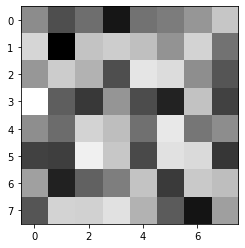

In [17]:
plt.imshow(model.coefs_[0][:, 10].reshape((8, -1)), cmap=plt.cm.Greys_r);

In [23]:
model.loss_curve_

AttributeError: 'Sequential' object has no attribute 'loss_curve_'

Теперь попробуем сверточные и рекуррентные сети из Keras

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

2023-06-09 16:23:35.824438: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-09 16:23:35.847185: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Хорошо, сперва полносвязанная сеть.

In [6]:
model = keras.Sequential()
model.add(layers.Dense(128, activation="tanh", kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(64,)))
model.add(layers.Dense(128, activation="tanh", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dense(10, activation="softmax"))
model.compile(keras.optimizers.SGD(learning_rate=0.001), 
          keras.losses.MeanSquaredError(reduction='sum'),
          metrics=['accuracy']
         )


In [7]:
train_y2 = []
for y in train_y:
    y2 = np.zeros(10)
    y2[y] = 1
    train_y2.append(y2)
    
test_y2 = []
for y in test_y:
    y2 = np.zeros(10)
    y2[y] = 1
    test_y2.append(y2)
    
train_y2 = np.array(train_y2)
test_y2 = np.array(test_y2)

In [8]:
train_y2

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
model.fit(train_x, train_y2, epochs=200, batch_size=5)

Epoch 1/200
288/288 [==============================] - 0s 686us/step - loss: 0.6889 - accuracy: 0.0919
Epoch 2/200
288/288 [==============================] - 0s 677us/step - loss: 0.6688 - accuracy: 0.1461
Epoch 3/200
288/288 [==============================] - 0s 656us/step - loss: 0.6473 - accuracy: 0.2575
Epoch 4/200
288/288 [==============================] - 0s 664us/step - loss: 0.6256 - accuracy: 0.3424
Epoch 5/200
288/288 [==============================] - 0s 682us/step - loss: 0.6046 - accuracy: 0.3911
Epoch 6/200
288/288 [==============================] - 0s 652us/step - loss: 0.5848 - accuracy: 0.4280
Epoch 7/200
288/288 [==============================] - 0s 649us/step - loss: 0.5664 - accuracy: 0.4516
Epoch 8/200
288/288 [==============================] - 0s 645us/step - loss: 0.5495 - accuracy: 0.4920
Epoch 9/200
288/288 [==============================] - 0s 650us/step - loss: 0.5337 - accuracy: 0.5539
Epoch 10/200
288/288 [==============================] - 0s 636us/step - l

288/288 [==============================] - 0s 669us/step - loss: 0.1966 - accuracy: 0.9930
Epoch 158/200
288/288 [==============================] - 0s 649us/step - loss: 0.1963 - accuracy: 0.9930
Epoch 159/200
288/288 [==============================] - 0s 643us/step - loss: 0.1960 - accuracy: 0.9930
Epoch 160/200
288/288 [==============================] - 0s 676us/step - loss: 0.1957 - accuracy: 0.9930
Epoch 161/200
288/288 [==============================] - 0s 710us/step - loss: 0.1954 - accuracy: 0.9930
Epoch 162/200
288/288 [==============================] - 0s 671us/step - loss: 0.1951 - accuracy: 0.9930
Epoch 163/200
288/288 [==============================] - 0s 659us/step - loss: 0.1949 - accuracy: 0.9930
Epoch 164/200
288/288 [==============================] - 0s 650us/step - loss: 0.1945 - accuracy: 0.9930
Epoch 165/200
288/288 [==============================] - 0s 648us/step - loss: 0.1943 - accuracy: 0.9930
Epoch 166/200
288/288 [==============================] - 0s 667us/ste

In [10]:
y_hat = model.predict(test_x)

12/12 [==============================] - 0s 775us/step


In [11]:
y_hat

array([[9.3701512e-01, 5.1145523e-04, 2.3112925e-02, ..., 1.2179433e-03,
        1.2640504e-03, 1.0598480e-02],
       [5.7754079e-03, 6.7761806e-03, 7.8323421e-05, ..., 4.2409855e-03,
        1.7385153e-03, 1.2766531e-03],
       [4.0765796e-04, 4.9734337e-04, 2.8688072e-03, ..., 9.6815318e-01,
        1.3293507e-02, 2.2244384e-03],
       ...,
       [1.3364435e-02, 2.4724612e-03, 4.0367144e-04, ..., 1.0516499e-03,
        9.1743475e-04, 4.3298313e-04],
       [2.5433939e-04, 1.1203498e-04, 1.8200411e-04, ..., 9.9295181e-01,
        5.5053848e-04, 1.7077372e-03],
       [5.3137168e-03, 1.4720210e-02, 6.4075756e-04, ..., 3.7032549e-04,
        1.5527740e-02, 2.2641692e-04]], dtype=float32)

In [12]:
test_y

array([[0, 4, 7, 1, 5, 6, 7, 6, 4, 4, 6, 1, 2, 0, 2, 9, 9, 8, 7, 0, 9, 8,
        6, 8, 4, 5, 6, 6, 1, 3, 7, 3, 1, 7, 8, 6, 7, 0, 7, 5, 1, 4, 4, 9,
        4, 5, 5, 7, 1, 2, 3, 6, 1, 0, 4, 8, 1, 9, 2, 7, 4, 4, 7, 4, 2, 8,
        1, 1, 4, 7, 1, 9, 1, 2, 9, 2, 2, 9, 0, 7, 1, 4, 4, 4, 2, 6, 5, 8,
        5, 5, 1, 9, 9, 5, 2, 4, 0, 8, 9, 1, 7, 8, 0, 4, 4, 6, 8, 2, 8, 8,
        1, 5, 3, 3, 2, 0, 4, 3, 8, 7, 3, 4, 1, 5, 3, 9, 9, 1, 7, 6, 5, 9,
        9, 2, 7, 3, 5, 0, 0, 3, 2, 2, 1, 7, 4, 1, 7, 2, 8, 1, 5, 1, 8, 1,
        2, 5, 6, 1, 7, 6, 8, 5, 7, 0, 9, 8, 0, 3, 1, 6, 5, 2, 8, 3, 1, 2,
        1, 2, 8, 7, 4, 2, 0, 5, 5, 3, 3, 4, 0, 5, 5, 9, 0, 3, 8, 7, 6, 4,
        3, 2, 7, 6, 0, 1, 3, 4, 6, 7, 6, 7, 7, 7, 5, 7, 1, 6, 8, 4, 4, 1,
        9, 0, 7, 0, 5, 8, 1, 0, 0, 3, 7, 9, 2, 1, 1, 5, 3, 7, 2, 5, 0, 6,
        2, 9, 9, 1, 5, 7, 5, 9, 5, 0, 2, 7, 6, 7, 9, 2, 2, 2, 1, 3, 5, 5,
        7, 4, 3, 0, 2, 7, 1, 0, 1, 9, 1, 0, 5, 7, 1, 4, 2, 0, 4, 4, 7, 5,
        6, 7, 1, 5, 6, 2, 2, 3, 9, 1, 

In [13]:
y_hat = [np.argmax(y) for y in y_hat]

In [14]:
y_hat

[0,
 4,
 7,
 1,
 5,
 6,
 7,
 6,
 4,
 4,
 6,
 1,
 2,
 0,
 2,
 9,
 9,
 1,
 7,
 0,
 9,
 8,
 6,
 8,
 4,
 5,
 6,
 6,
 1,
 3,
 7,
 5,
 1,
 7,
 8,
 6,
 7,
 0,
 7,
 5,
 1,
 4,
 4,
 9,
 4,
 5,
 5,
 7,
 1,
 2,
 2,
 6,
 1,
 0,
 4,
 8,
 1,
 9,
 2,
 7,
 4,
 4,
 7,
 4,
 2,
 8,
 1,
 1,
 4,
 7,
 1,
 9,
 1,
 2,
 8,
 2,
 2,
 9,
 0,
 7,
 1,
 4,
 4,
 4,
 2,
 6,
 5,
 8,
 5,
 5,
 1,
 9,
 9,
 5,
 3,
 4,
 0,
 8,
 9,
 1,
 7,
 6,
 0,
 4,
 8,
 6,
 8,
 2,
 8,
 8,
 1,
 5,
 3,
 3,
 2,
 0,
 4,
 3,
 8,
 7,
 3,
 4,
 1,
 5,
 3,
 9,
 9,
 1,
 7,
 6,
 5,
 9,
 9,
 2,
 7,
 3,
 5,
 0,
 0,
 3,
 2,
 2,
 1,
 7,
 4,
 1,
 7,
 2,
 8,
 1,
 5,
 1,
 8,
 3,
 2,
 5,
 6,
 1,
 7,
 6,
 8,
 5,
 7,
 0,
 9,
 8,
 0,
 3,
 1,
 6,
 5,
 2,
 8,
 3,
 1,
 2,
 1,
 2,
 1,
 7,
 4,
 2,
 0,
 9,
 5,
 3,
 3,
 4,
 0,
 5,
 5,
 9,
 0,
 3,
 8,
 7,
 6,
 4,
 3,
 2,
 7,
 6,
 0,
 1,
 3,
 4,
 6,
 7,
 6,
 7,
 7,
 7,
 5,
 7,
 1,
 6,
 8,
 4,
 4,
 1,
 9,
 0,
 7,
 0,
 5,
 2,
 1,
 0,
 0,
 3,
 7,
 9,
 2,
 1,
 1,
 5,
 3,
 7,
 2,
 5,
 0,
 6,
 2,
 9,
 9,
 1,
 5,
 7,
 5,
 9,


In [15]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[33,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 29,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  1,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 30]])

In [16]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 0.95555556, 0.93181818, 0.93548387, 1.        ,
        0.97560976, 0.96774194, 1.        , 0.91666667, 0.96774194]),
 array([0.97058824, 0.97727273, 0.97619048, 0.93548387, 0.97297297,
        0.97560976, 1.        , 1.        , 0.84615385, 0.96774194]),
 array([0.98507463, 0.96629213, 0.95348837, 0.93548387, 0.98630137,
        0.97560976, 0.98360656, 1.        , 0.88      , 0.96774194]),
 array([34, 44, 42, 31, 37, 41, 30, 44, 26, 31]))

In [17]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9666666666666667

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 26,122
Trainable params: 26,122
Non-trainable params: 0
_________________________________________________________________


Теперь сверточные сети.

In [19]:
model = keras.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(keras.optimizers.Adam(learning_rate=0.001), keras.losses.MeanSquaredError(reduction='sum'))


In [20]:
train_x3 = train_x.reshape(-1, 64, 1)
train_y3 = train_y2.reshape(-1, 10, 1)
test_x3 = test_x.reshape(-1, 64, 1)
test_y3 = test_y2.reshape(-1, 10, 1)

In [21]:
model.fit(train_x3, train_y3, epochs=20)#, validation_data=(test_x3, test_y3))

Epoch 1/20
45/45 [==============================] - 0s 2ms/step - loss: 1.2130
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 0.3163
Epoch 3/20
45/45 [==============================] - 0s 2ms/step - loss: 0.1838
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 0.1478
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.1068
Epoch 6/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0744
Epoch 7/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0512
Epoch 8/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 9/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 10/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 11/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0335
Epoch 12/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0378
Epoch 13/20
45/45 [==============================

In [22]:
y_hat = model.predict(test_x3)

12/12 [==============================] - 0s 1ms/step


In [23]:
y_hat = [np.argmax(y) for y in y_hat]

In [24]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  4,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 30,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  2,  2,  0,  0,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]])

In [25]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 0.95121951, 0.85714286, 1.        , 0.97297297,
        1.        , 1.        , 1.        , 1.        , 0.93939394]),
 array([1.        , 0.88636364, 1.        , 0.96774194, 0.97297297,
        0.97560976, 1.        , 1.        , 0.84615385, 1.        ]),
 array([1.        , 0.91764706, 0.92307692, 0.98360656, 0.97297297,
        0.98765432, 1.        , 1.        , 0.91666667, 0.96875   ]),
 array([34, 44, 42, 31, 37, 41, 30, 44, 26, 31]))

In [26]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9666666666666667

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 62, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 32)            3104      
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                19210     
                                                                 
Total params: 22,442
Trainable params: 22,442
Non-trainable params: 0
_________________________________________________________________


LSTM

In [36]:
model = keras.Sequential()
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.), 
               keras.losses.MeanSquaredError(reduction='sum'),
               metrics=[keras.metrics.Precision()])



In [37]:
model.fit(train_x3, train_y3, epochs=20)

Epoch 1/20


2023-06-09 16:26:37.322124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-09 16:26:37.323320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-09 16:26:37.324054: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-06-09 16:26:38.563242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]


45/45 [==============================] - 2s 13ms/step - loss: 2.7746 - precision_1: 0.0000e+00
Epoch 2/20
45/45 [==============================] - 1s 13ms/step - loss: 2.1543 - precision_1: 0.8732
Epoch 3/20
45/45 [==============================] - 1s 13ms/step - loss: 1.5740 - precision_1: 0.8823
Epoch 4/20
45/45 [==============================] - 1s 13ms/step - loss: 1.2627 - precision_1: 0.8709
Epoch 5/20
45/45 [==============================] - 1s 13ms/step - loss: 1.0504 - precision_1: 0.8828
Epoch 6/20
45/45 [==============================] - 1s 13ms/step - loss: 0.8828 - precision_1: 0.8918
Epoch 7/20
45/45 [==============================] - 1s 13ms/step - loss: 0.7679 - precision_1: 0.9016
Epoch 8/20
45/45 [==============================] - 1s 13ms/step - loss: 0.6535 - precision_1: 0.9237
Epoch 9/20
45/45 [==============================] - 1s 13ms/step - loss: 0.5683 - precision_1: 0.9147
Epoch 10/20
45/45 [==============================] - 1s 13ms/step - loss: 0.5334 - precis

In [38]:
y_hat = model.predict(test_x3)

2023-06-09 16:26:52.152123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-09 16:26:52.153703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-09 16:26:52.154804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12/12 [==============================] - 1s 8ms/step


In [39]:
y_hat = [np.argmax(y) for y in y_hat]

In [40]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  2,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  3,  0,  1],
       [ 0,  1,  1,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 1,  2,  0,  0,  0,  0,  1,  0, 21,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]])

In [41]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([0.97142857, 0.91666667, 0.975     , 0.9375    , 1.        ,
        0.97368421, 0.93333333, 0.93617021, 1.        , 0.93939394]),
 array([1.        , 1.        , 0.92857143, 0.96774194, 0.97297297,
        0.90243902, 0.93333333, 1.        , 0.80769231, 1.        ]),
 array([0.98550725, 0.95652174, 0.95121951, 0.95238095, 0.98630137,
        0.93670886, 0.93333333, 0.96703297, 0.89361702, 0.96875   ]),
 array([34, 44, 42, 31, 37, 41, 30, 44, 26, 31]))

In [42]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9555555555555556

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 128)              33792     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 35,082
Trainable params: 35,082
Non-trainable params: 0
_________________________________________________________________
